In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
import glob
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn pyarrow seaborn imblearn xgboost| grep -v 'already satisfied'

#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Defaulting to user installation because normal site-packages is not writeable
  distutils: /home/smb38/.local/lib/python3.9/site-packages
  sysconfig: /home/smb38/.local/lib64/python3.9/site-packages
  user = True
  home = None
  root = None
  prefix = None


In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

<Axes: >

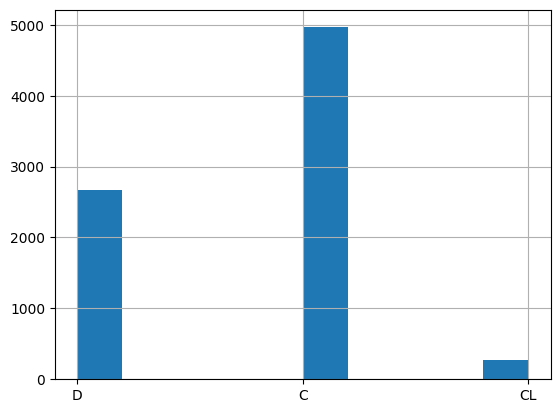

In [5]:
df["Status"].hist()

In [6]:
# unbalanced init!

In [7]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [8]:
df.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [9]:
NaN_count = df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [10]:
# nothing empty! lez go

In [11]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [12]:
# create train and validation sets that are divided equally

In [13]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(df, stratify=df["Status"], test_size=0.2)

In [14]:
# Distribution in the train and validation set

Text(0.5, 0.98, 'Distribution of Disruptions in Training and Test Sets')

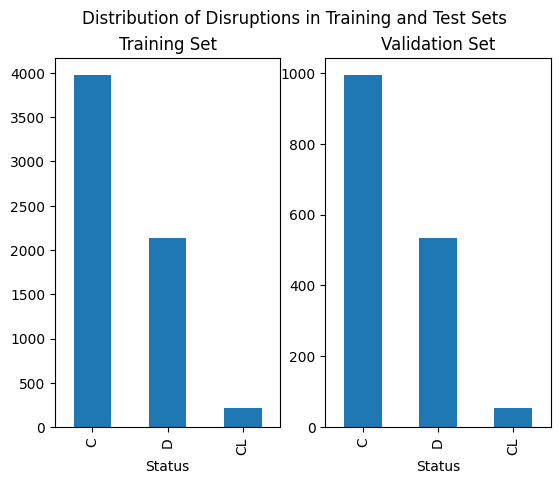

In [15]:
plt.subplot(1,2,1)
#train['Status'].hist()
train["Status"].value_counts().plot(kind="bar")

plt.title("Training Set")

plt.subplot(1,2,2)
#validation["Status"].hist()
validation["Status"].value_counts().plot(kind="bar")

plt.title("Validation Set")

plt.suptitle("Distribution of Disruptions in Training and Test Sets")

In [16]:
#the distribution is similar in training and test set

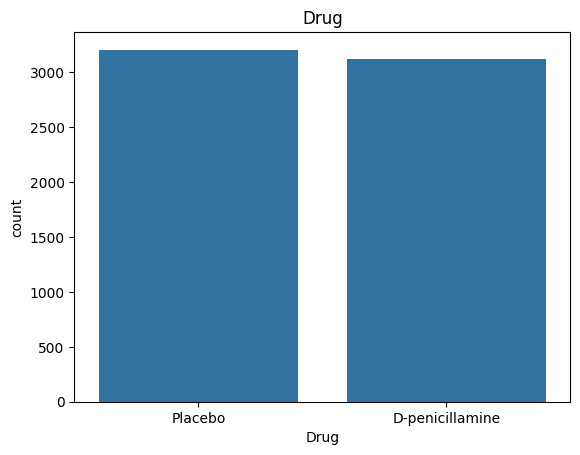

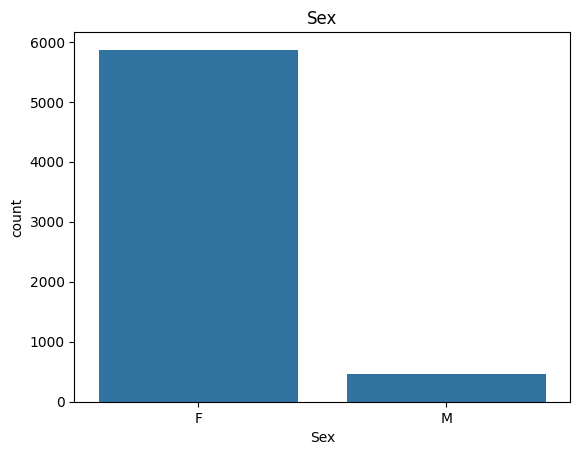

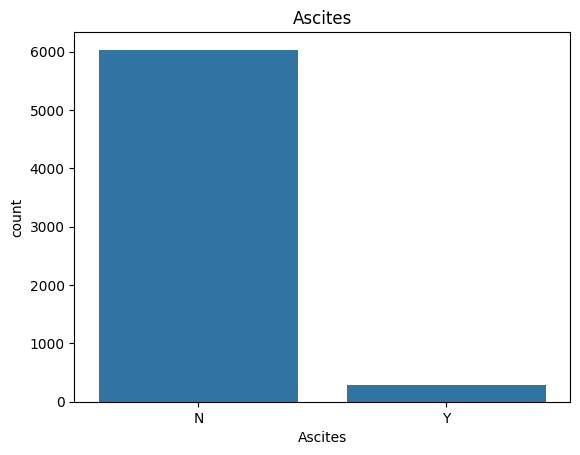

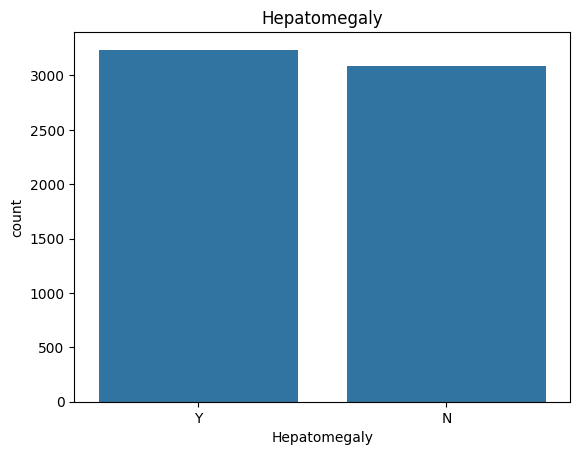

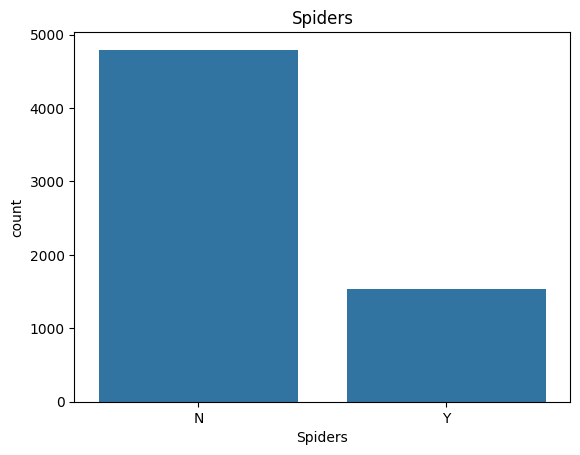

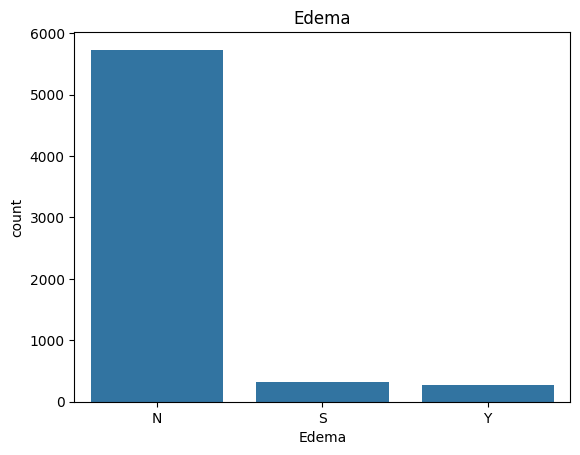

In [17]:
import seaborn as sns

categorical_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]

for i in categorical_values:
    sns.barplot(x=train[i].value_counts().index,y=train[i].value_counts()).set_title(i)
    plt.show()

In [18]:
# i should have done the stratified split which included sex, ascites, spiders, edema

In [19]:
# Will do it in the next iteration

In [20]:
train.Drug.replace(("Placebo", "D-penicillamine"), (0,1), inplace = True)
train.Sex.replace(("F", "M"), (0,1), inplace = True)
train.Ascites.replace(("N", "Y"), (0,1), inplace = True)
train.Hepatomegaly.replace(("N", "Y"), (0,1), inplace = True)
train.Spiders.replace(("N", "Y"), (0,1), inplace = True)
# train.Edema.replace(("N", "Y", "S"), (0,1,2), inplace = True)

In [21]:
#one hot encode the status and edema

In [22]:
status_dummies = pd.get_dummies(train.Status)
edema_dummies = pd.get_dummies(train.Edema)
train = pd.concat([train, edema_dummies, status_dummies], axis=1)

In [23]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,N,S,Y,C,CL,D
2832,2832,1746,0,22546,0,0,1,1,Y,1.4,178.0,3.63,50.0,933.0,79.05,78.0,254.0,12.0,4.0,D,False,False,True,False,False,True
4952,4952,4556,1,14610,0,0,0,0,N,0.8,258.0,3.60,152.0,5487.2,82.15,230.0,427.0,10.0,1.0,C,True,False,False,True,False,False
624,624,4127,0,20510,0,0,0,0,N,0.7,198.0,4.01,14.0,911.0,57.35,56.0,280.0,10.6,3.0,C,True,False,False,True,False,False
1610,1610,1536,0,16714,1,0,0,0,N,2.5,317.0,3.26,217.0,714.0,130.20,140.0,388.0,10.1,4.0,D,True,False,False,False,False,True
7150,7150,3388,0,22836,0,0,0,0,N,0.6,212.0,4.03,10.0,648.0,71.30,107.0,228.0,10.8,4.0,C,True,False,False,True,False,False


In [24]:
train.N.replace((False,True), (0,1), inplace = True)
train.S.replace((False,True), (0,1), inplace = True)
train.Y.replace((False,True), (0,1), inplace = True)
train.C.replace((False,True), (0,1), inplace = True)
train.CL.replace((False,True), (0,1), inplace = True)
train.D.replace((False,True), (0,1), inplace = True)

In [25]:
train = train.drop("Edema",axis = 1)
train = train.drop("Status",axis = 1)

In [26]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
2832,2832,1746,0,22546,0,0,1,1,1.4,178.0,3.63,50.0,933.0,79.05,78.0,254.0,12.0,4.0,0,0,1,0,0,1
4952,4952,4556,1,14610,0,0,0,0,0.8,258.0,3.60,152.0,5487.2,82.15,230.0,427.0,10.0,1.0,1,0,0,1,0,0
624,624,4127,0,20510,0,0,0,0,0.7,198.0,4.01,14.0,911.0,57.35,56.0,280.0,10.6,3.0,1,0,0,1,0,0
1610,1610,1536,0,16714,1,0,0,0,2.5,317.0,3.26,217.0,714.0,130.20,140.0,388.0,10.1,4.0,1,0,0,0,0,1
7150,7150,3388,0,22836,0,0,0,0,0.6,212.0,4.03,10.0,648.0,71.30,107.0,228.0,10.8,4.0,1,0,0,1,0,0


In [27]:
train.dtypes

id                 int64
N_Days             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
N                  int64
S                  int64
Y                  int64
C                  int64
CL                 int64
D                  int64
dtype: object

In [28]:
numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [29]:
#visualise corelation matrix

In [30]:
train.corr()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
id,1.000000,-0.017830,0.007452,-0.016246,-0.014855,0.014248,0.011008,0.001924,0.012431,-0.006119,-0.026530,0.018299,-0.003271,0.017869,-0.000387,-0.018396,-0.000563,-0.013619,0.005004,-0.015193,0.009085,-0.004051,0.014062,-0.001309
N_Days,-0.017830,1.000000,0.002264,-0.105023,-0.064226,-0.254744,-0.279051,-0.206776,-0.340933,-0.150399,0.257516,-0.289442,-0.035567,-0.244658,-0.195062,0.140121,-0.154682,-0.214597,0.249494,-0.108480,-0.240080,0.348945,-0.074049,-0.328056
Drug,0.007452,0.002264,1.000000,0.084081,0.046500,0.048820,-0.058846,0.000119,-0.042963,0.007557,-0.035786,-0.011632,-0.001255,-0.044129,-0.056792,-0.019050,-0.048655,-0.025471,-0.036240,0.011741,0.039161,-0.027237,0.031865,0.015495
Age,-0.016246,-0.105023,0.084081,1.000000,0.104602,0.154684,0.112175,0.058422,0.089515,-0.053973,-0.116918,0.092351,0.030722,-0.017391,0.026985,-0.098298,0.146532,0.112911,-0.137490,0.081828,0.108758,-0.136938,-0.103057,0.179952
Sex,-0.014855,-0.064226,0.046500,0.104602,1.000000,0.031621,0.059428,-0.021873,0.035922,0.013228,-0.029109,0.161206,0.006039,0.062043,0.075592,-0.050818,0.077746,0.032160,-0.063021,0.086917,-0.002908,-0.134588,0.007128,0.134840
Ascites,0.014248,-0.254744,0.048820,0.154684,0.031621,1.000000,0.177623,0.202205,0.367311,-0.041479,-0.332869,0.284783,0.060840,0.119743,0.148259,-0.175275,0.292341,0.168745,-0.519034,0.080092,0.654906,-0.256861,-0.025424,0.272469
Hepatomegaly,0.011008,-0.279051,-0.058846,0.112175,0.059428,0.177623,1.000000,0.333777,0.294979,0.136941,-0.263878,0.269580,0.133379,0.200964,0.161035,-0.200013,0.253329,0.494607,-0.221528,0.130614,0.176549,-0.387551,0.028297,0.385262
Spiders,0.001924,-0.206776,0.000119,0.058422,-0.021873,0.202205,0.333777,1.000000,0.258361,0.049546,-0.230033,0.258331,0.077249,0.151215,0.085926,-0.156845,0.266058,0.278625,-0.254273,0.130210,0.223693,-0.317785,0.023725,0.315706
Bilirubin,0.012431,-0.340933,-0.042963,0.089515,0.035922,0.367311,0.294979,0.258361,1.000000,0.310798,-0.299681,0.441362,0.133282,0.370587,0.309580,-0.069342,0.287058,0.196440,-0.320440,0.151409,0.295447,-0.425108,0.024457,0.425149
Cholesterol,-0.006119,-0.150399,0.007557,-0.053973,0.013228,-0.041479,0.136941,0.049546,0.310798,1.000000,-0.092369,0.169078,0.126729,0.327636,0.268356,0.089362,0.025674,0.043300,0.025757,0.006032,-0.043184,-0.198165,0.066799,0.176710


<Axes: >

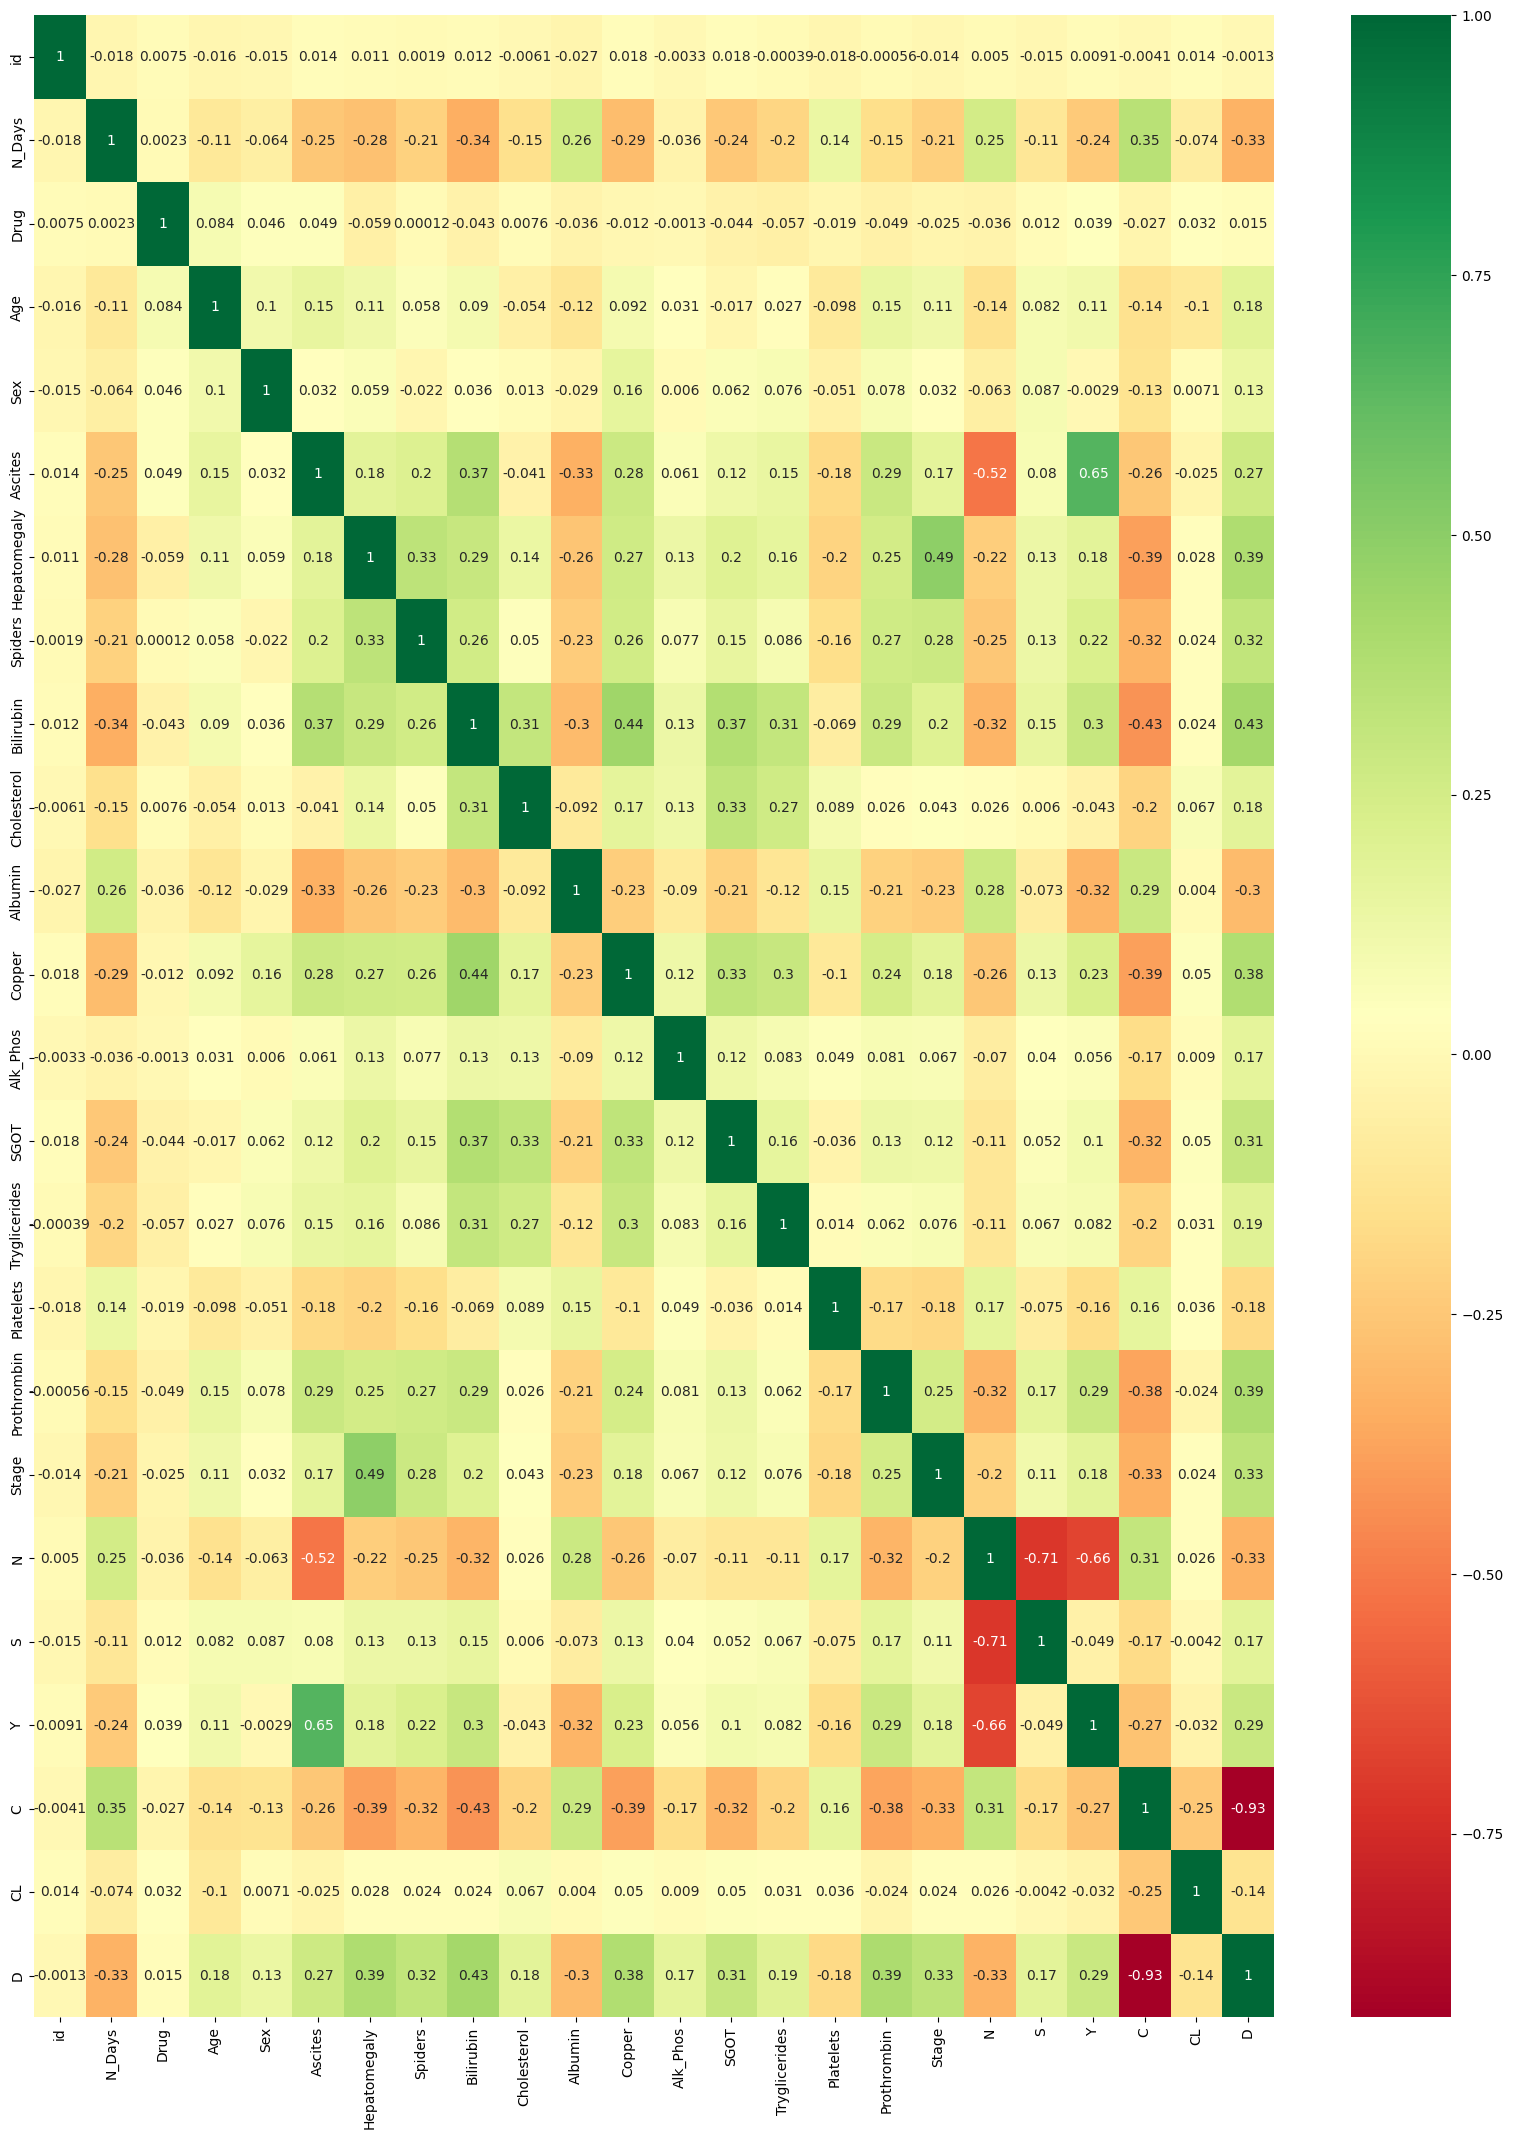

In [31]:
plt.figure(figsize=(20,26))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")

In [32]:
features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

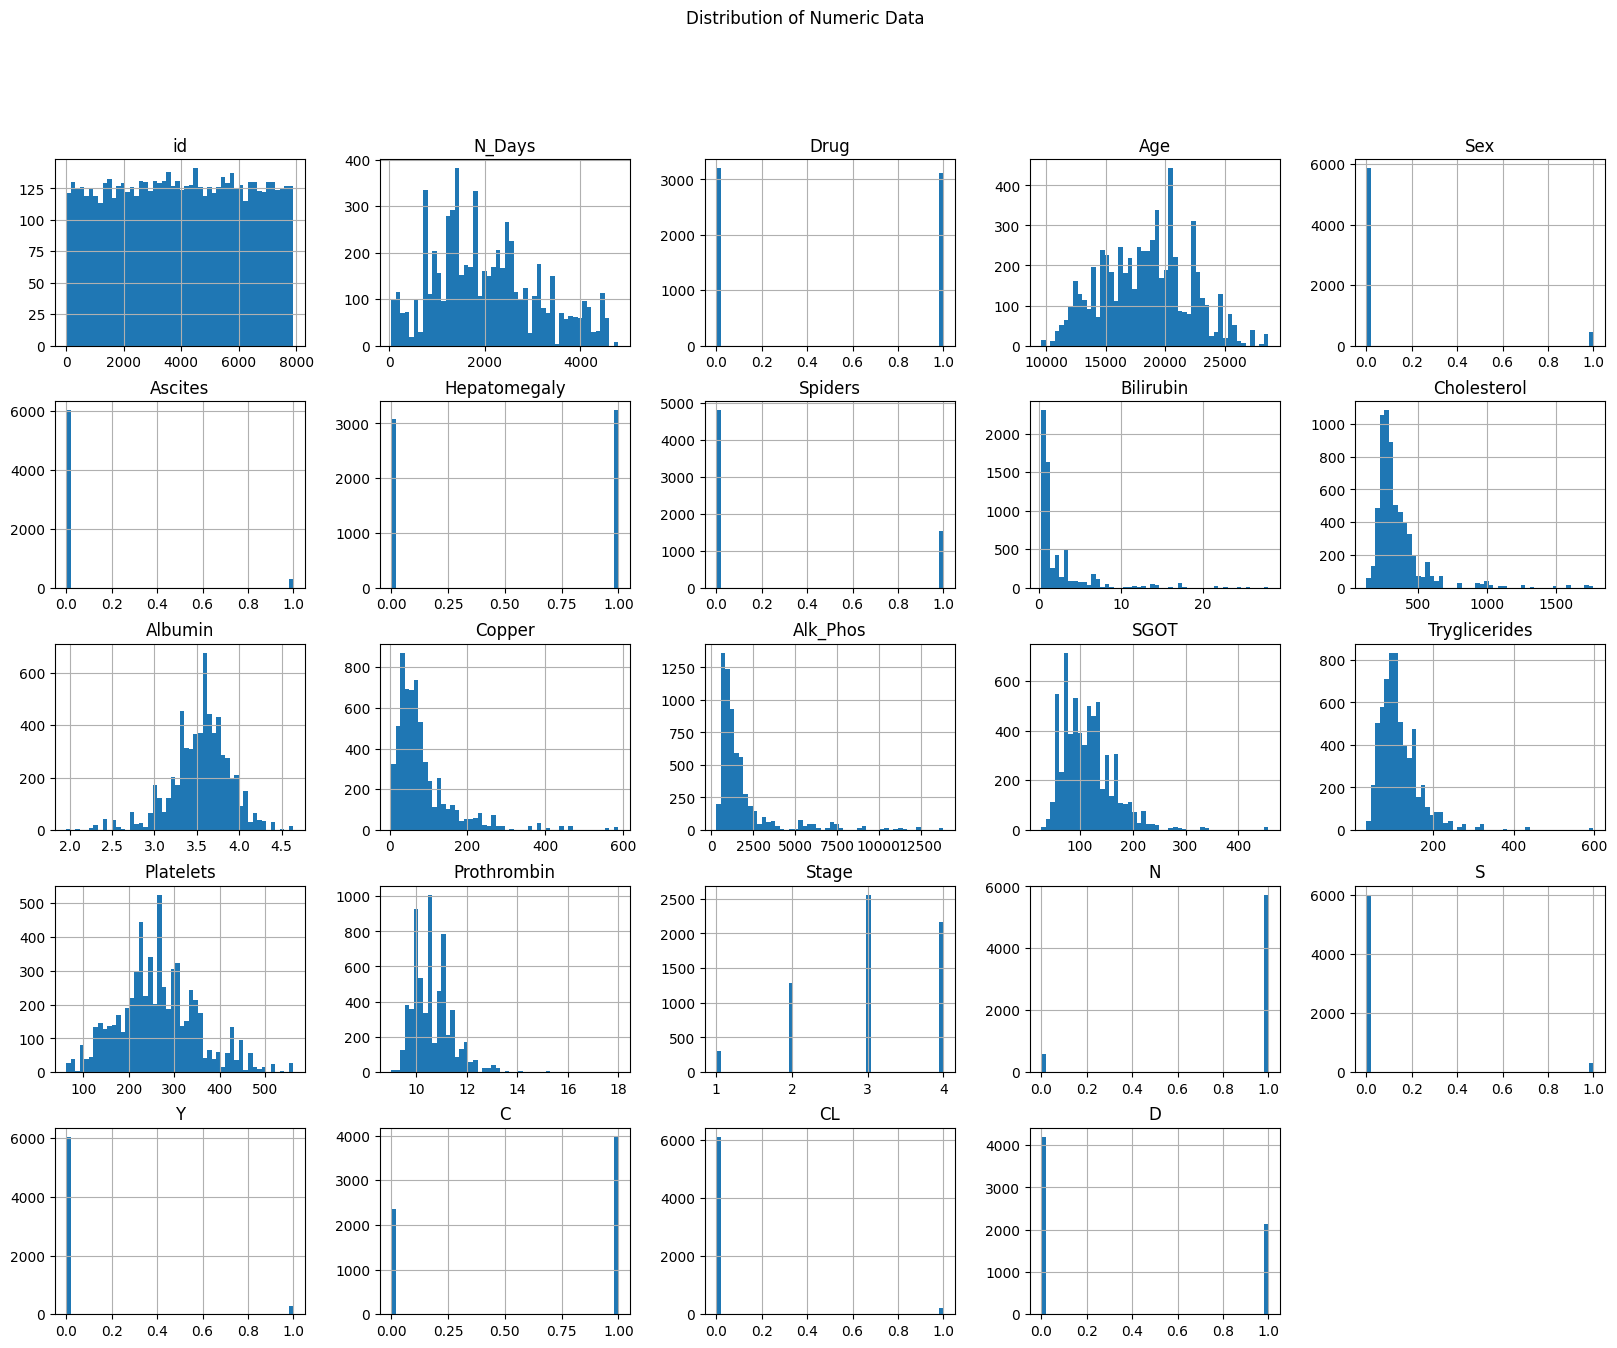

In [33]:
train.hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [34]:
#Most of the data here needs to be normalised, mostly right skewed

In [35]:
# lets look at the ones that matter

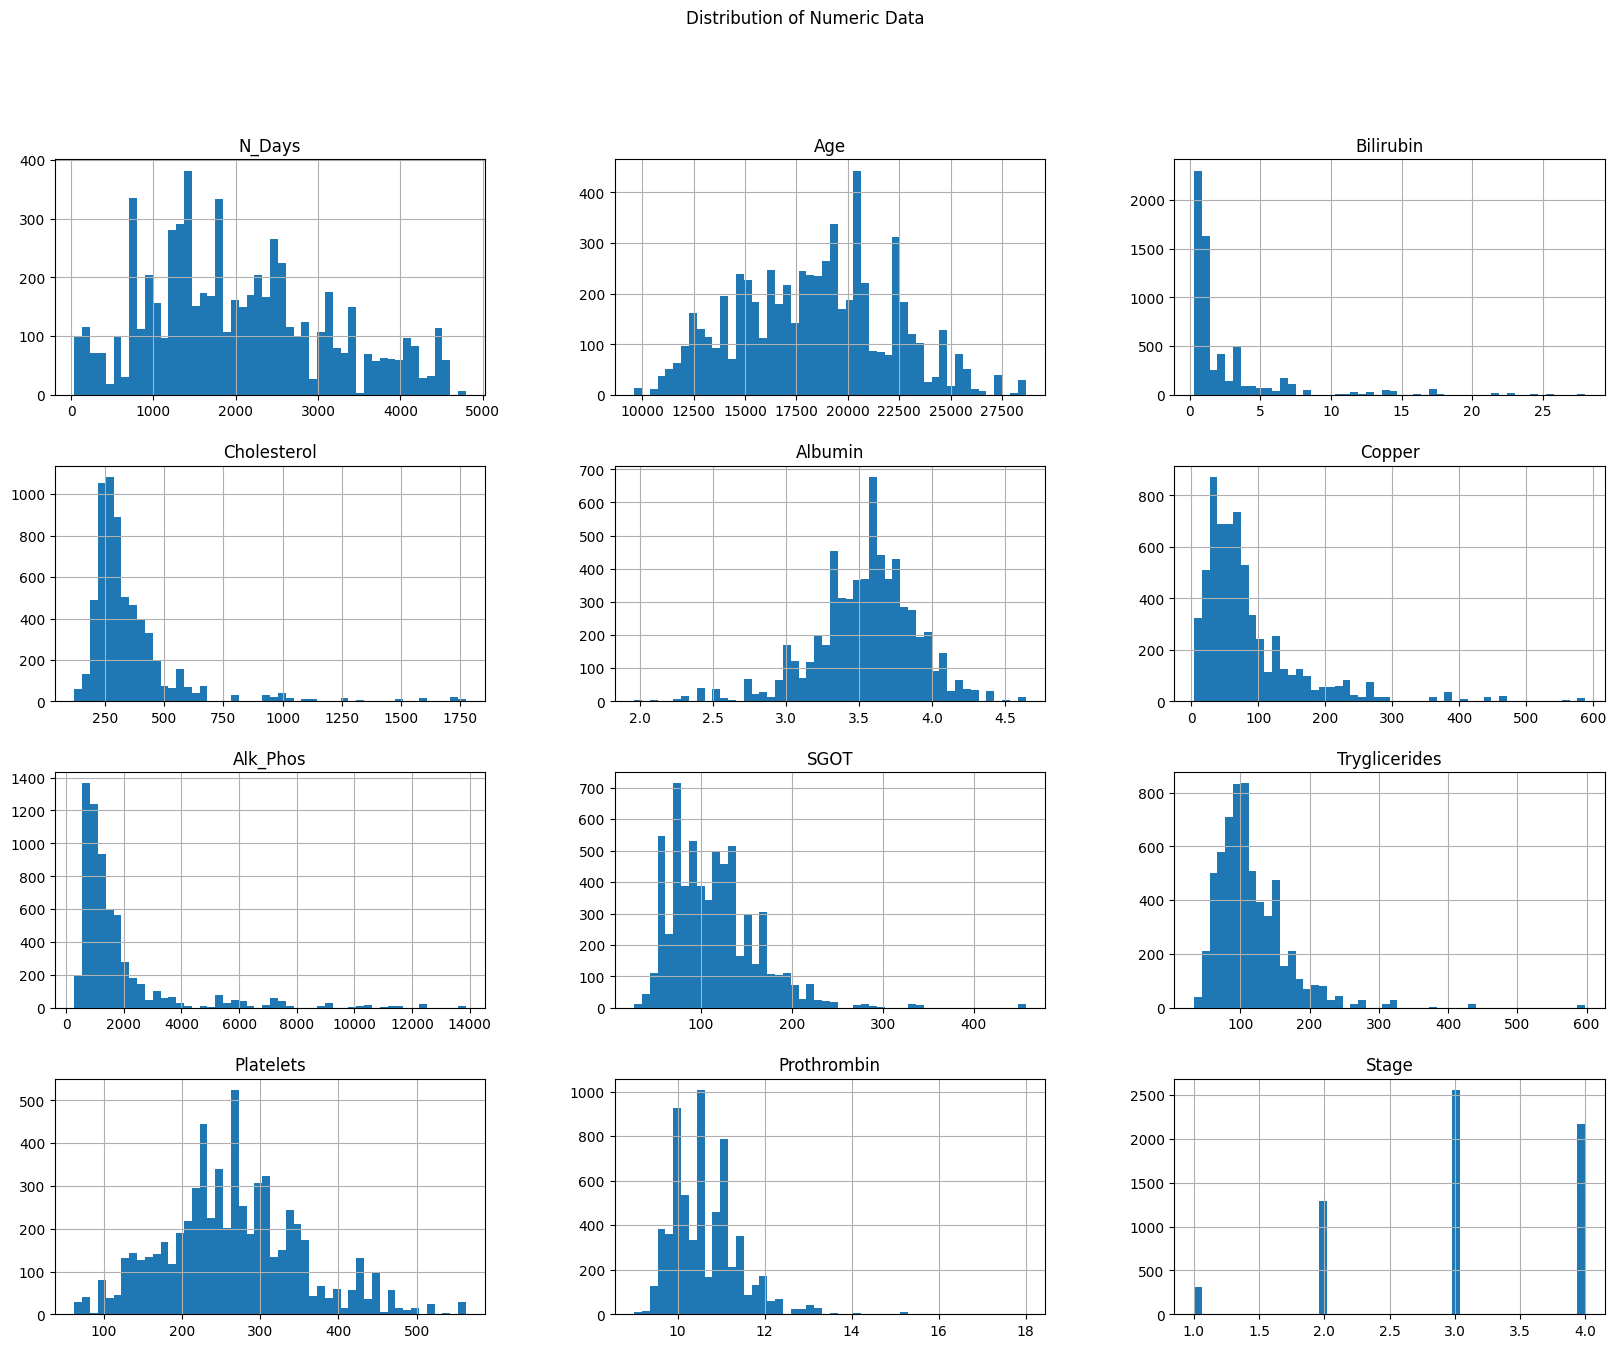

In [36]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]
# scaler_minmax = MinMaxScaler()
# train[features_to_scale] = scaler_minmax.fit_transform(train[features_to_scale])
transformer = FunctionTransformer(np.log1p)
train[features_to_scale] = transformer.transform(train[features_to_scale])

In [38]:
# viz after scaling

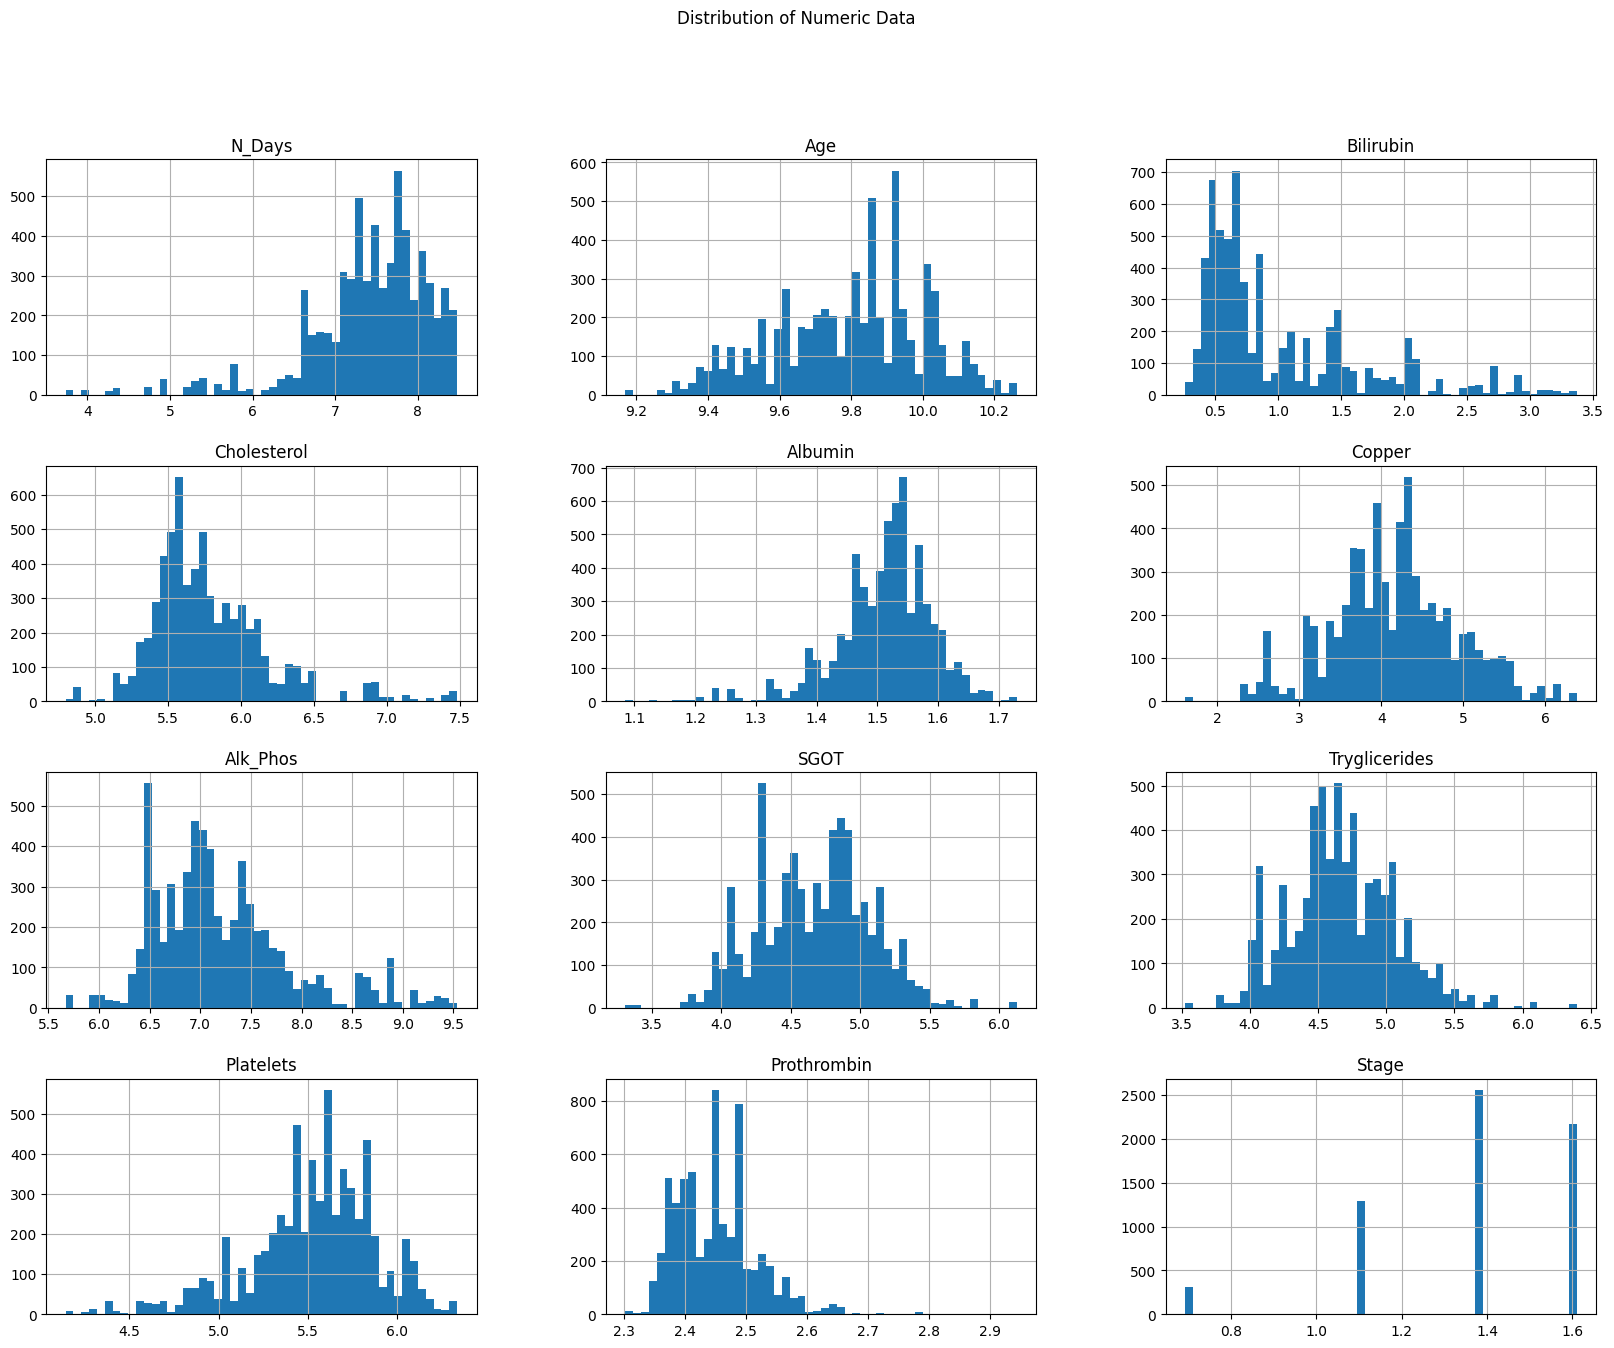

In [39]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [40]:
#looks scaled!!! atleast a bit, cause data is on a similar scale

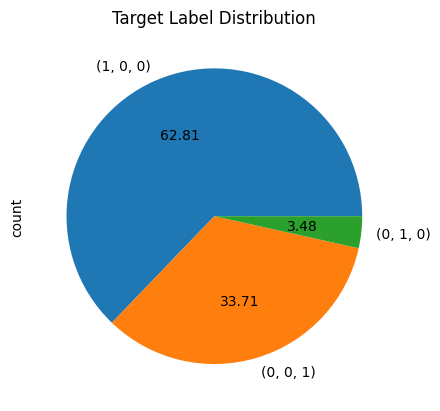

In [41]:
ax = train[["C","CL","D"]].value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("Target Label Distribution")

In [42]:
# looking at the target distribution, it looks like there's a big imbalence....... We need to balance the data ......

In [43]:
# for the next step i presume

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 2832 to 6932
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6324 non-null   int64  
 1   N_Days         6324 non-null   float64
 2   Drug           6324 non-null   int64  
 3   Age            6324 non-null   float64
 4   Sex            6324 non-null   int64  
 5   Ascites        6324 non-null   int64  
 6   Hepatomegaly   6324 non-null   int64  
 7   Spiders        6324 non-null   int64  
 8   Bilirubin      6324 non-null   float64
 9   Cholesterol    6324 non-null   float64
 10  Albumin        6324 non-null   float64
 11  Copper         6324 non-null   float64
 12  Alk_Phos       6324 non-null   float64
 13  SGOT           6324 non-null   float64
 14  Tryglicerides  6324 non-null   float64
 15  Platelets      6324 non-null   float64
 16  Prothrombin    6324 non-null   float64
 17  Stage          6324 non-null   float64
 18  N         

In [45]:
#This function randomly deletes attributes
def make_random_nans(df, percent_rows, percent_columns):
    num_rows_to_nan = int(percent_rows * len(df))
    num_columns_to_nan = int(percent_columns * len(df.columns))

    rows_to_nan = np.random.choice(df.index, num_rows_to_nan, replace=False)

    for row in rows_to_nan:
        columns_to_nan = np.random.choice(df.columns, num_columns_to_nan, replace=False)
        df.loc[row, columns_to_nan] = np.nan

In [57]:
#its better not to disturb the train set. Let's create a copy instead.
train_copy = train.copy()

In [58]:
# Making 10% of random attributes NaN in 10% of random rows
make_random_nans(train_copy, 0.1, 0.1)

In [59]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6324 entries, 2832 to 6932
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6221 non-null   float64
 1   N_Days         6217 non-null   float64
 2   Drug           6219 non-null   float64
 3   Age            6210 non-null   float64
 4   Sex            6209 non-null   float64
 5   Ascites        6210 non-null   float64
 6   Hepatomegaly   6218 non-null   float64
 7   Spiders        6230 non-null   float64
 8   Bilirubin      6229 non-null   float64
 9   Cholesterol    6210 non-null   float64
 10  Albumin        6214 non-null   float64
 11  Copper         6217 non-null   float64
 12  Alk_Phos       6225 non-null   float64
 13  SGOT           6237 non-null   float64
 14  Tryglicerides  6228 non-null   float64
 15  Platelets      6218 non-null   float64
 16  Prothrombin    6203 non-null   float64
 17  Stage          6216 non-null   float64
 18  N         

In [60]:
NaN_count = train_copy.isna().sum(axis = 0)
NaN_count

id               103
N_Days           107
Drug             105
Age              114
Sex              115
Ascites          114
Hepatomegaly     106
Spiders           94
Bilirubin         95
Cholesterol      114
Albumin          110
Copper           107
Alk_Phos          99
SGOT              87
Tryglicerides     96
Platelets        106
Prothrombin      121
Stage            108
N                101
S                133
Y                 94
C                103
CL                99
D                 83
dtype: int64

## KNN imputation 

In [61]:
from sklearn.impute import KNNImputer

In [62]:
train_copy.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
2832,2832.0,7.465655,0.0,10.023357,0.0,0.0,1.0,1.0,0.875469,5.187386,1.532557,3.931826,6.839476,4.382651,4.369448,5.541264,2.564949,1.609438,0.0,0.0,1.0,0.0,0.0,1.0
4952,4952.0,8.424420,1.0,9.589530,0.0,0.0,0.0,0.0,0.587787,5.556828,1.526056,5.030438,8.610356,4.420646,5.442418,6.059123,2.397895,0.693147,1.0,0.0,0.0,1.0,0.0,0.0
624,624.0,8.325548,0.0,9.928717,0.0,0.0,0.0,0.0,0.530628,5.293305,1.611436,2.708050,6.815640,4.066459,4.043051,5.638355,2.451005,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
1610,1610.0,7.337588,0.0,9.724062,1.0,0.0,0.0,0.0,1.252763,5.762051,1.449269,5.384495,6.572283,4.876723,4.948760,5.963579,2.406945,1.609438,1.0,0.0,0.0,0.0,0.0,1.0
7150,7150.0,8.128290,0.0,10.036137,0.0,0.0,0.0,0.0,0.470004,5.361292,1.615420,2.397895,6.475433,4.280824,4.682131,5.433722,2.468100,1.609438,1.0,0.0,0.0,1.0,0.0,0.0


In [63]:
# Initialise the KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [64]:
# Fit on the dataset and transform it to impute missing values
KNN_imputed_data = imputer.fit_transform(train_copy)

In [65]:
# Convert the imputed data back to a pandas DataFrame
KNN_imputed_df = pd.DataFrame(KNN_imputed_data, columns=train.columns)

In [66]:
# Check no values are missing 
NaN_count = KNN_imputed_df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64

In [67]:
KNN_imputed_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
0,2832.0,7.465655,0.0,10.023357,0.0,0.0,1.0,1.0,0.875469,5.187386,1.532557,3.931826,6.839476,4.382651,4.369448,5.541264,2.564949,1.609438,0.0,0.0,1.0,0.0,0.0,1.0
1,4952.0,8.424420,1.0,9.589530,0.0,0.0,0.0,0.0,0.587787,5.556828,1.526056,5.030438,8.610356,4.420646,5.442418,6.059123,2.397895,0.693147,1.0,0.0,0.0,1.0,0.0,0.0
2,624.0,8.325548,0.0,9.928717,0.0,0.0,0.0,0.0,0.530628,5.293305,1.611436,2.708050,6.815640,4.066459,4.043051,5.638355,2.451005,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
3,1610.0,7.337588,0.0,9.724062,1.0,0.0,0.0,0.0,1.252763,5.762051,1.449269,5.384495,6.572283,4.876723,4.948760,5.963579,2.406945,1.609438,1.0,0.0,0.0,0.0,0.0,1.0
4,7150.0,8.128290,0.0,10.036137,0.0,0.0,0.0,0.0,0.470004,5.361292,1.615420,2.397895,6.475433,4.280824,4.682131,5.433722,2.468100,1.609438,1.0,0.0,0.0,1.0,0.0,0.0
